In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df = pd.read_csv("weatherAUS.csv")
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,@dropdown
0,2008-12-01,Delhi,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,NaN
1,2008-12-02,Delhi,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,NaN
2,2008-12-03,Delhi,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,NaN
3,2008-12-04,Delhi,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,NaN
4,2008-12-05,Delhi,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,NaN


In [10]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Date                  0
Location              0
MinTemp            1485
MaxTemp            1261
Rainfall           3261
Evaporation       62790
Sunshine          69835
WindGustDir       10326
WindGustSpeed     10263
WindDir9am        10566
WindDir3pm         4228
WindSpeed9am       1767
WindSpeed3pm       3062
Humidity9am        2654
Humidity3pm        4507
Pressure9am       15065
Pressure3pm       15028
Cloud9am          55888
Cloud3pm          59358
Temp9am            1767
Temp3pm            3609
RainToday          3261
RainTomorrow       3253
@dropdown        145460
dtype: int64

In [21]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes':1, 'No':0})


In [22]:
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity3pm', 'Pressure3pm']
df = df[features + ['RainTomorrow']]
df.head()


,MinTemp,MaxTemp,Rainfall,Humidity3pm,Pressure3pm,RainTomorrow
0,13.4,22.9,0.6,22.0,1007.1,0.0
1,7.4,25.1,0.0,25.0,1007.8,0.0
2,12.9,25.7,0.0,30.0,1008.7,0.0
3,9.2,28.0,0.0,16.0,1012.8,0.0
4,17.5,32.3,1.0,33.0,1006.0,0.0


In [23]:
# Remove rows where target is missing
df = df.dropna(subset=['RainTomorrow'])

# Fill feature missing values
df[features] = df[features].fillna(df[features].mean())


In [24]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [26]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8352436537514942
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     22115
         1.0       0.69      0.47      0.56      6327

    accuracy                           0.84     28442
   macro avg       0.78      0.70      0.73     28442
weighted avg       0.82      0.84      0.82     28442



In [27]:
import pickle

pickle.dump(model, open("Rainfall.pkl", "wb"))
print("Model saved successfully!")


Model saved successfully!


In [5]:
# Count missing values for each column
missing = df.isnull().sum().sort_values(ascending=False)
print(missing)


@dropdown        145460
Sunshine          69835
Evaporation       62790
Cloud3pm          59358
Cloud9am          55888
Pressure9am       15065
Pressure3pm       15028
WindDir9am        10566
WindGustDir       10326
WindGustSpeed     10263
Humidity3pm        4507
WindDir3pm         4228
Temp3pm            3609
RainToday          3261
Rainfall           3261
RainTomorrow       3253
WindSpeed3pm       3062
Humidity9am        2654
Temp9am            1767
WindSpeed9am       1767
MinTemp            1485
MaxTemp            1261
Location              0
Date                  0
dtype: int64


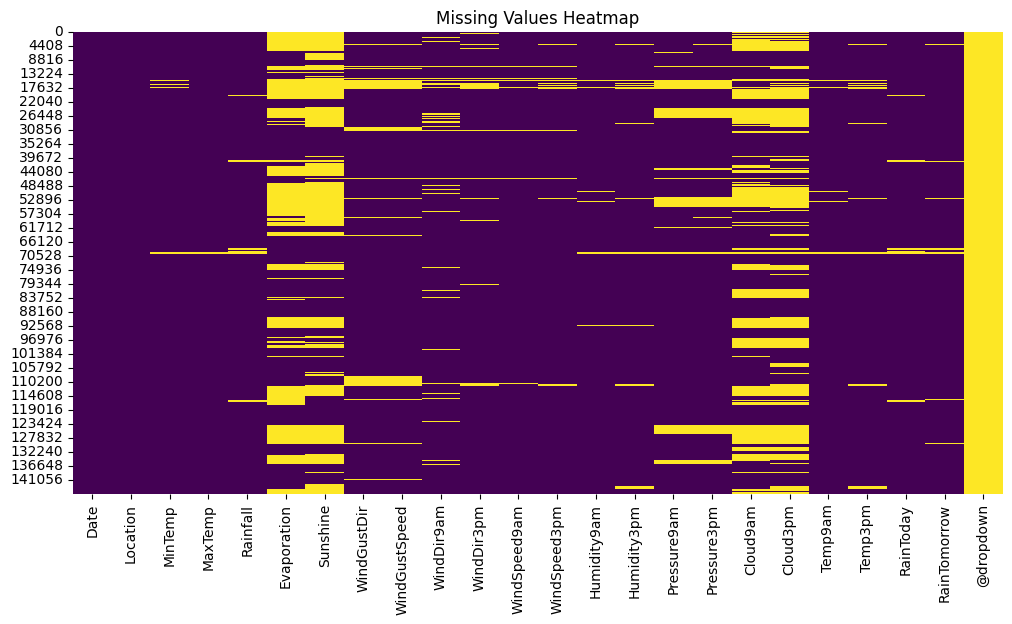

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


In [7]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_percent)


@dropdown        100.000000
Sunshine          48.009762
Evaporation       43.166506
Cloud3pm          40.807095
Cloud9am          38.421559
Pressure9am       10.356799
Pressure3pm       10.331363
WindDir9am         7.263853
WindGustDir        7.098859
WindGustSpeed      7.055548
Humidity3pm        3.098446
WindDir3pm         2.906641
Temp3pm            2.481094
Rainfall           2.241853
RainToday          2.241853
RainTomorrow       2.236354
WindSpeed3pm       2.105046
Humidity9am        1.824557
Temp9am            1.214767
WindSpeed9am       1.214767
MinTemp            1.020899
MaxTemp            0.866905
dtype: float64


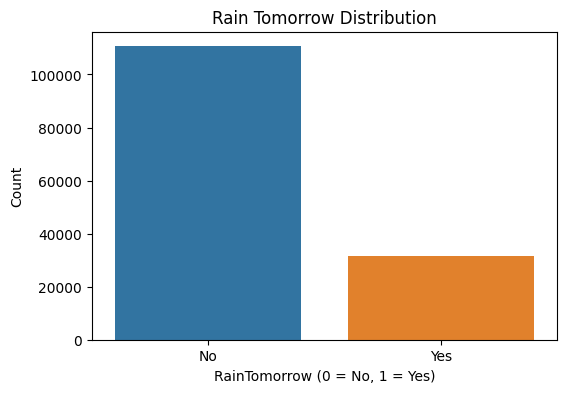

No     77.771136
Yes    22.228864
Name: RainTomorrow, dtype: float64


In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='RainTomorrow', data=df)
plt.title("Rain Tomorrow Distribution")
plt.xlabel("RainTomorrow (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Show percentage
print(df['RainTomorrow'].value_counts(normalize=True) * 100)


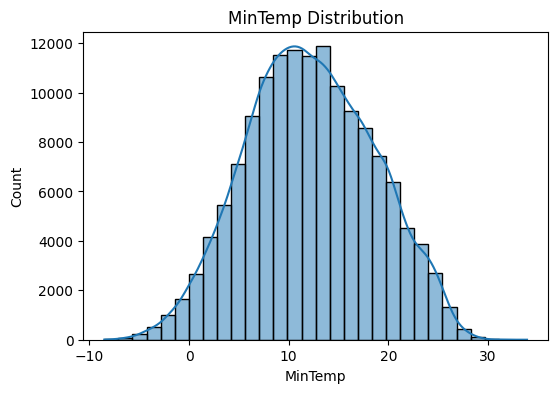

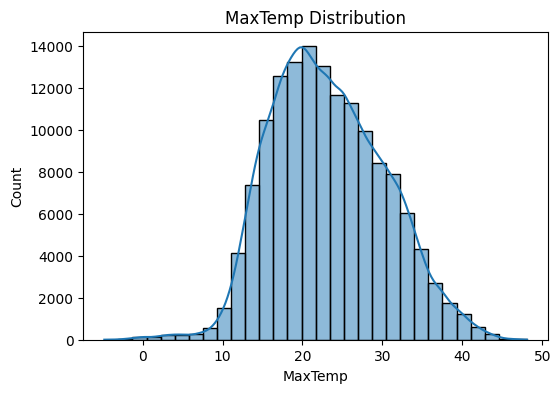

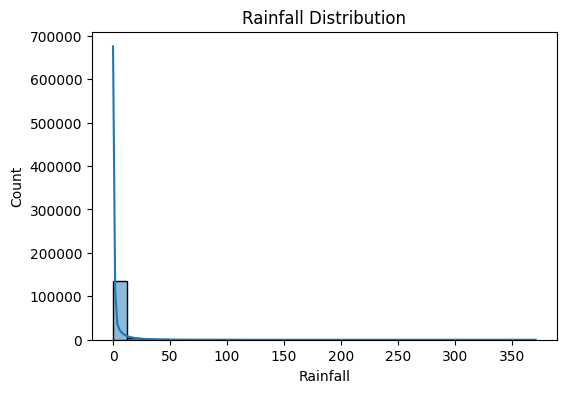

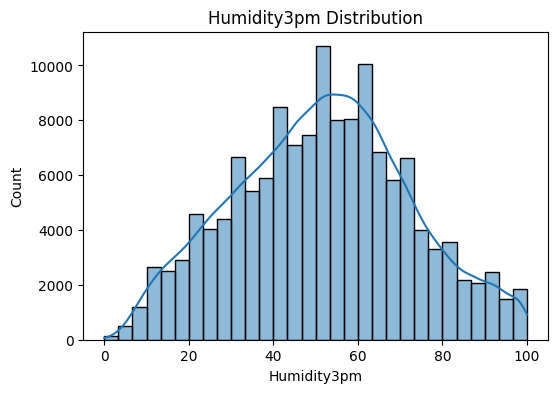

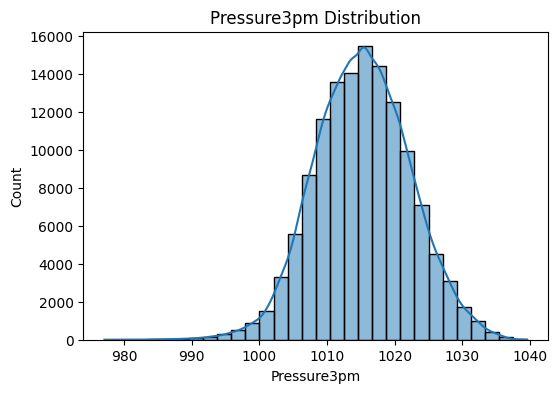

In [9]:
numeric_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity3pm', 'Pressure3pm']

for feature in numeric_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"{feature} Distribution")
    plt.show()


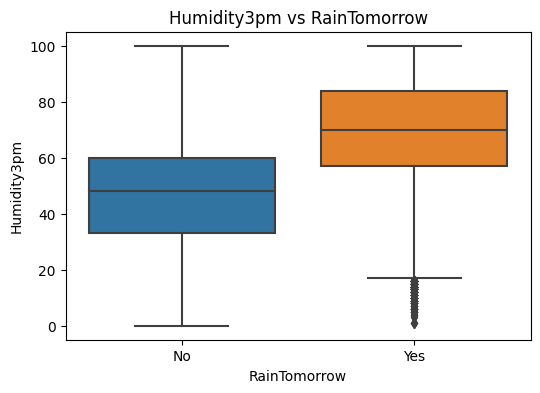

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x='RainTomorrow', y='Humidity3pm', data=df)
plt.title("Humidity3pm vs RainTomorrow")
plt.show()


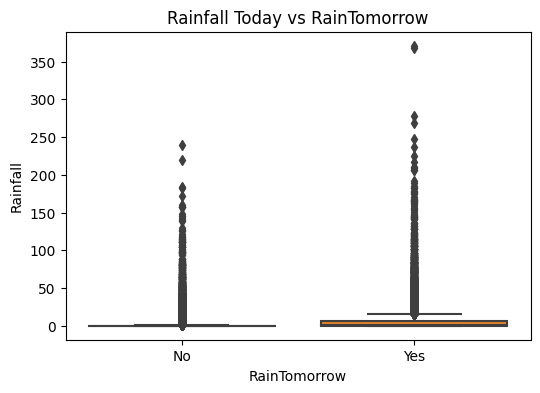

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(x='RainTomorrow', y='Rainfall', data=df)
plt.title("Rainfall Today vs RainTomorrow")
plt.show()


C:\Users\shaik\AppData\Local\Temp\ipykernel_15152\3174845194.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


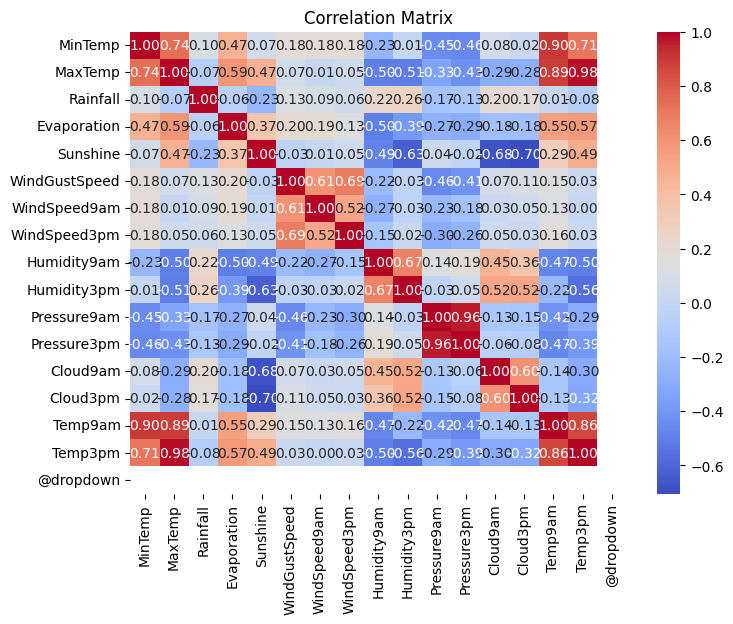

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


c:\Users\shaik\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


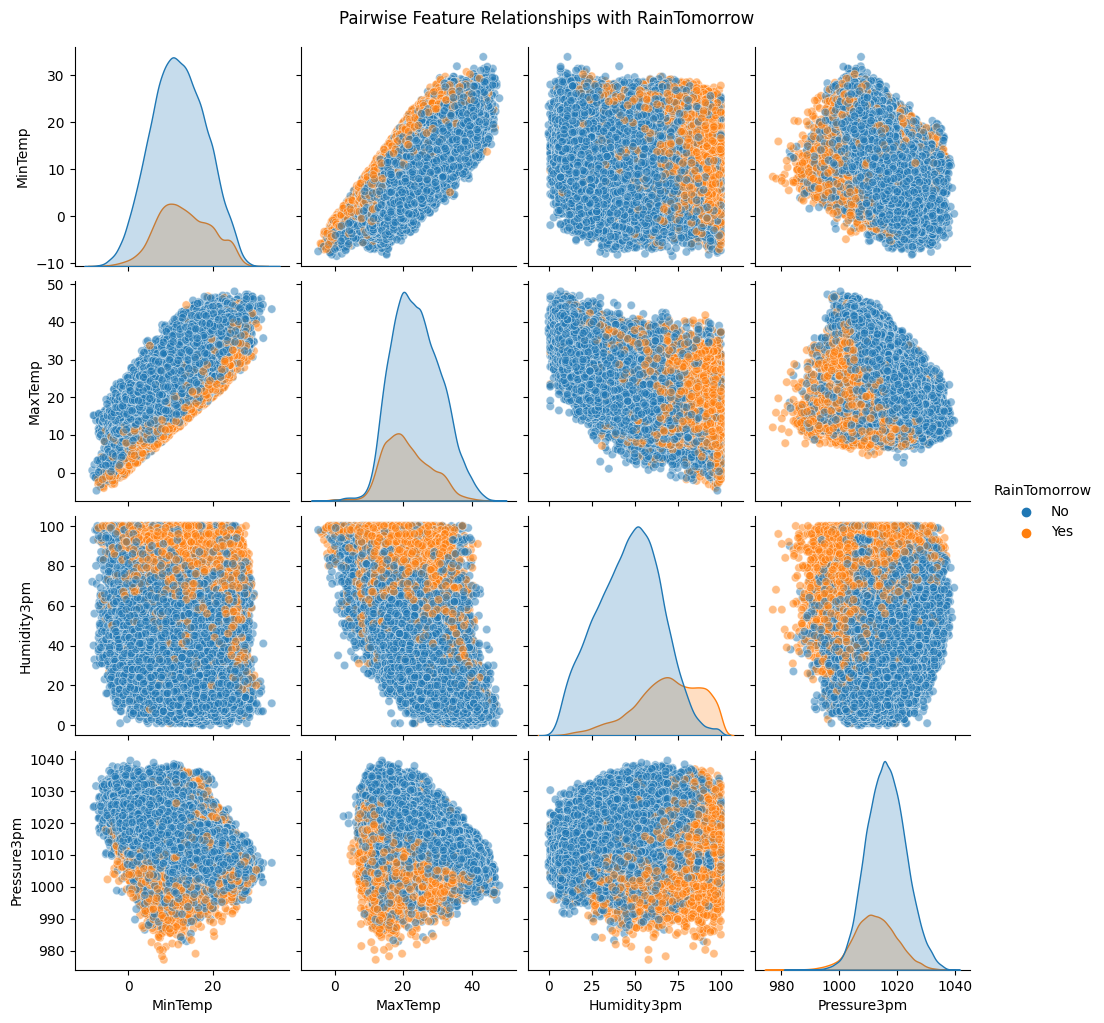

In [9]:
sns.pairplot(df, vars=['MinTemp','MaxTemp','Humidity3pm','Pressure3pm'], 
             hue='RainTomorrow', plot_kws={'alpha':0.5})
plt.suptitle("Pairwise Feature Relationships with RainTomorrow", y=1.02)
plt.show()


C:\Users\shaik\AppData\Local\Temp\ipykernel_17668\377948802.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['RainTomorrow']==0]['Humidity3pm'], label='No Rain', shade=True)
C:\Users\shaik\AppData\Local\Temp\ipykernel_17668\377948802.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['RainTomorrow']==1]['Humidity3pm'], label='Rain', shade=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


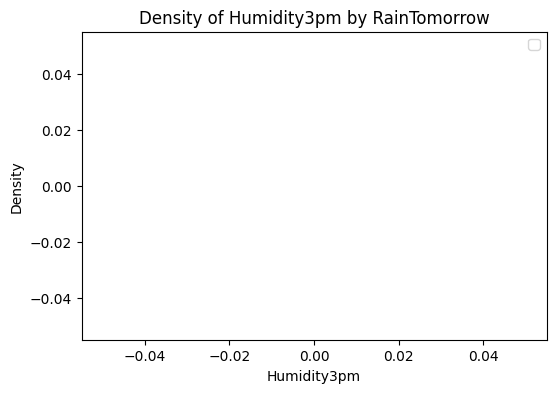

In [11]:
plt.figure(figsize=(6,4))
sns.kdeplot(df[df['RainTomorrow']==0]['Humidity3pm'], label='No Rain', shade=True)
sns.kdeplot(df[df['RainTomorrow']==1]['Humidity3pm'], label='Rain', shade=True)
plt.title("Density of Humidity3pm by RainTomorrow")
plt.xlabel("Humidity3pm")
plt.ylabel("Density")
plt.legend()
plt.show()


C:\Users\shaik\AppData\Local\Temp\ipykernel_17668\2001218806.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['RainTomorrow']==0]['Pressure3pm'], label='No Rain', shade=True)
C:\Users\shaik\AppData\Local\Temp\ipykernel_17668\2001218806.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['RainTomorrow']==1]['Pressure3pm'], label='Rain', shade=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


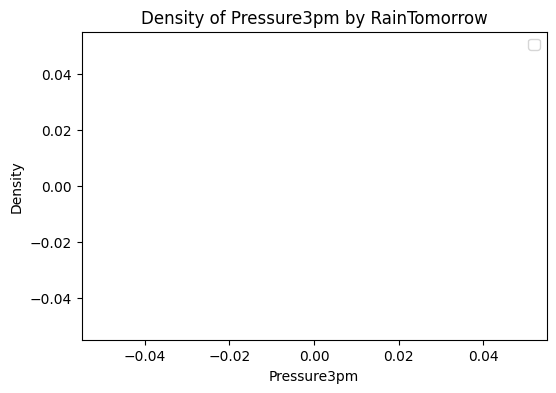

In [12]:
plt.figure(figsize=(6,4))
sns.kdeplot(df[df['RainTomorrow']==0]['Pressure3pm'], label='No Rain', shade=True)
sns.kdeplot(df[df['RainTomorrow']==1]['Pressure3pm'], label='Rain', shade=True)
plt.title("Density of Pressure3pm by RainTomorrow")
plt.xlabel("Pressure3pm")
plt.ylabel("Density")
plt.legend()
plt.show()


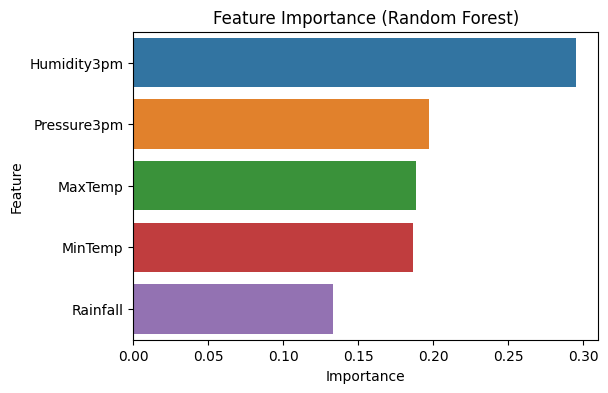

       Feature  Importance
3  Humidity3pm    0.295383
4  Pressure3pm    0.196949
1      MaxTemp    0.188219
0      MinTemp    0.186226
2     Rainfall    0.133223


In [28]:
# Create the feature importance DataFrame
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot the importances
plt.figure(figsize=(6,4))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance (Random Forest)")
plt.show()

# Print the table
print(feature_importances)


In [29]:
corr_target = df.corr()['RainTomorrow'].sort_values(ascending=False)
print(corr_target)


RainTomorrow    1.000000
Humidity3pm     0.437741
Rainfall        0.235739
MinTemp         0.084707
MaxTemp        -0.157585
Pressure3pm    -0.212310
Name: RainTomorrow, dtype: float64
